# Load image

In [25]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [26]:
fname = os.path.join("..", "data", "img", "coins.png")

In [27]:
image = cv2.imread(fname)

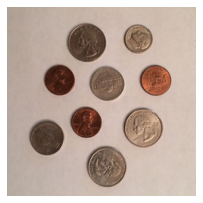

In [28]:
jimshow(image)

In [29]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

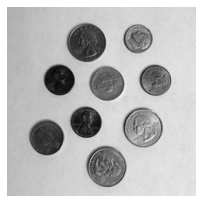

In [30]:
jimshow_channel(grey_image)

# Sobel operators

In [31]:
sobelX = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0) # CV_64F is specifying: "64 bit floating point numbers"
sobelY = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1) # CV_64F is specifying: "64 bit floating point numbers", The last two numbers are "X"(axis) and "Y" (axis) 

In [38]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

In [39]:
sobel_edges = np.hstack([sobelX, sobelY])

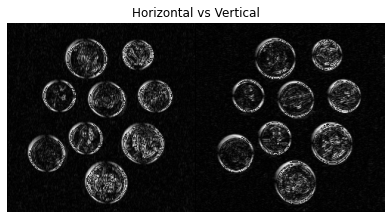

In [40]:
jimshow_channel(sobel_edges, "Horizontal vs Vertical")

In [41]:
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

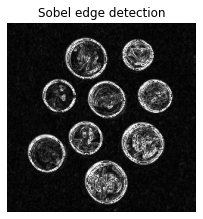

In [48]:
jimshow_channel(sobel_combined, "Sobel edge detection")

# Laplacian

In [44]:
laplace = cv2.Laplacian(grey_image, cv2.CV_64F)

In [45]:
laplace = np.uint8(np.absolute(laplace))

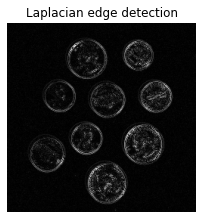

In [47]:
jimshow_channel(laplace, "Laplacian edge detection")

# Canny edge detection

In [51]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)

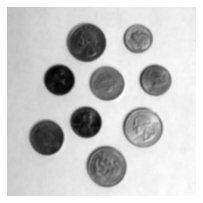

In [52]:
jimshow_channel(blurred)

In [53]:
canny = cv2.Canny(blurred, 30, 150)

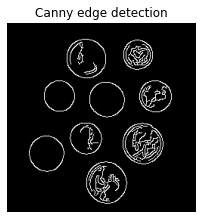

In [55]:
jimshow_channel(canny, "Canny edge detection")

# Finding contours

In [57]:
contours, _ =cv2.findContours(canny.copy(), # .copy() is just so that we don't overwrite the original image, but rather do it on a copy
cv2.RETR_EXTERNAL, # This takes only the external structures (we don't want edges within each coin)
cv2.CHAIN_APPROX_SIMPLE, ) # The method of getting approximated contours


''' cv2.drawContours(image, contours, fill, color, thickness) '''

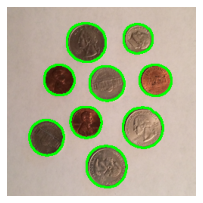

In [63]:
jimshow(cv2.drawContours(image.copy(), # draw contours on original
contours, # our list of contours
-1, #which contours to draw -1 means all. -> 1 would mean first contour 
(0, 255, 0), # contour color
2)) # contour pixel width

In [67]:
print(type(contours))
print(len(contours))

<class 'list'>
9


array([[[ 99,  21]],

       [[ 98,  22]],

       [[ 95,  22]],

       [[ 94,  23]],

       [[ 92,  23]],

       [[ 91,  24]],

       [[ 90,  24]],

       [[ 88,  26]],

       [[ 87,  26]],

       [[ 84,  29]],

       [[ 84,  30]],

       [[ 82,  32]],

       [[ 82,  33]],

       [[ 81,  34]],

       [[ 81,  35]],

       [[ 80,  36]],

       [[ 80,  39]],

       [[ 79,  40]],

       [[ 79,  52]],

       [[ 80,  53]],

       [[ 80,  56]],

       [[ 81,  57]],

       [[ 81,  58]],

       [[ 83,  60]],

       [[ 83,  61]],

       [[ 90,  68]],

       [[ 91,  68]],

       [[ 92,  69]],

       [[ 93,  69]],

       [[ 94,  70]],

       [[ 96,  70]],

       [[ 97,  71]],

       [[ 99,  71]],

       [[100,  72]],

       [[111,  72]],

       [[112,  71]],

       [[114,  71]],

       [[115,  70]],

       [[116,  70]],

       [[117,  69]],

       [[118,  69]],

       [[120,  67]],

       [[121,  67]],

       [[125,  63]],

       [[125,  62]],

       [[1